# matplotlib 学习

## 0.学习路线

1. 基本概念 (OOP 思想，自顶向下)
2. 官方教程 (常见 API 及其用法)
3. 官方画廊 (多看)
4. 自身专业领域常见绘图 (多收集总结)

<br>

## 1.基本概念

- 分清楚 `plt.***` 和 `ax.***` 画图的区别：[matplotlib：先搞明白plt. /ax./ fig再画](https://zhuanlan.zhihu.com/p/93423829) (评论区高赞回复讲得也很棒)
- 理解画布 (figure) 上的各个组成部分，各个部分可以看作对象，针对各个对象进行精细的操作 (OOP 思想)：[Matplotlib 优雅作图笔记](https://zhuanlan.zhihu.com/p/113842270)
- matplotlib 架构上分为 3 层，`plt.` 操作对应最高层（短平快），`ax.` 操作对应中层（精细准）
  - 最高层：scripting layer
  - 中层：artist layer
  - 底层：backend layer

各个组成部分

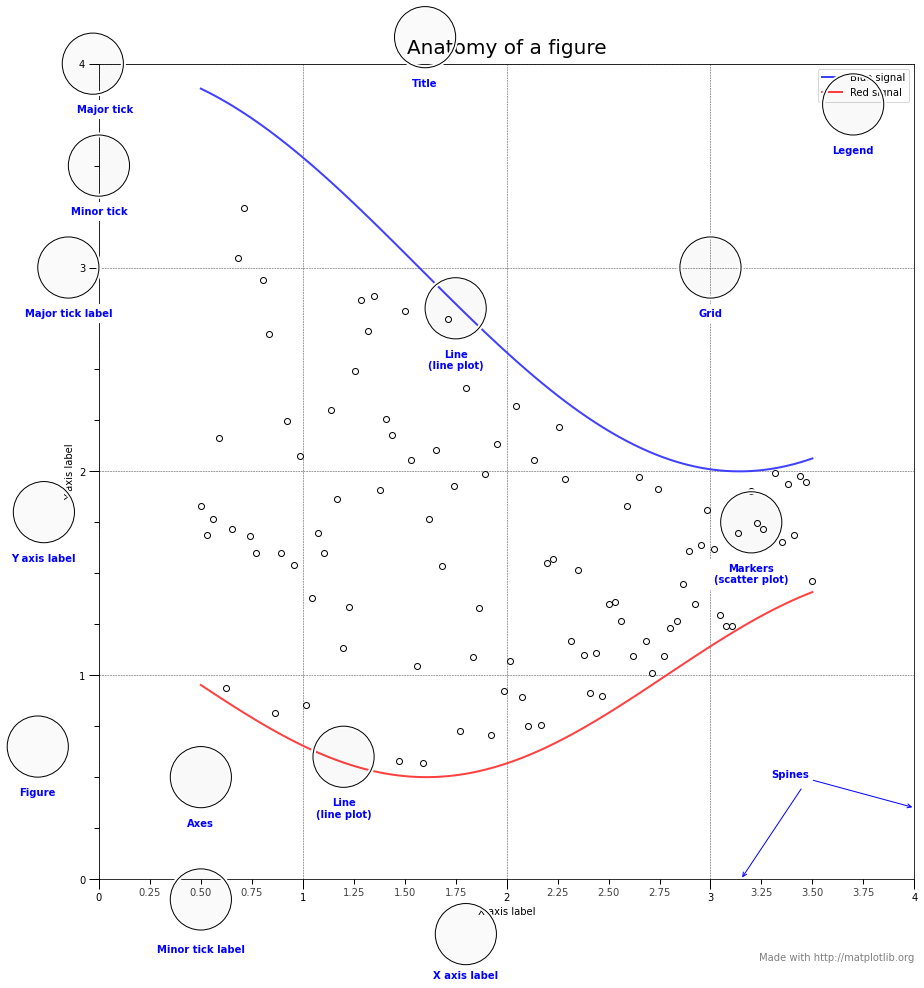

In [33]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

Demo

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
A = np.arange(1, 5)
B = A ** 2
C = A ** 3

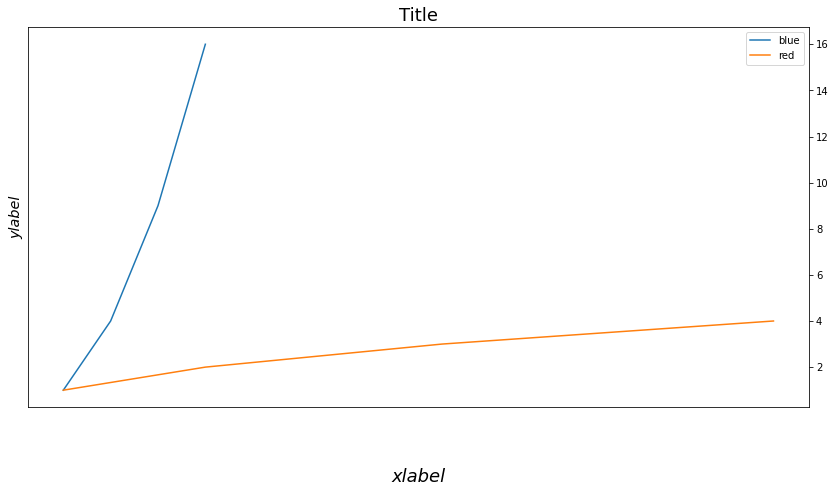

In [10]:
fig, ax = plt.subplots(figsize=(14, 7))
# fig, ax = plt.subplots(2,1,figsize(14,7))
# ax[0].***
# ax[1].***
ax.plot(A, B)
ax.plot(B, A)
ax.set_title('Title', fontsize=18)
ax.set_xlabel('xlabel', fontsize=18, fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend(['blue', 'red'])
ax.xaxis.set_tick_params(rotation=45, labelsize=18, colors='w')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1))
ax.yaxis.tick_right()

<br>

## 2.官方教程

[教程地址](https://matplotlib.org/stable/tutorials/index.html)

### Introductory

**Usage Guide**

- 区分 `Figure`, `Axes`, `Axis` 和 `Artist`
- 两种作图方法：`plt` 和 `ax` (推荐后者；其实还有第 3 种高阶的 backend 作图方法)
- 输入数据的类型应为 `numpy.array` 或 `numpy.ma.masked_array`，其他的类型也会在内部转为 `numpy.array` 类型，但有可能出错
- OOP 思想画图
- (后面的就涉及高阶用法了，没有看)

**Pyplot tutorial**

主要是 Matlab 的绘图风格，不予详细展开。

**Sample plots in Matplotlib**



<br>

## 3.官方画廊

[画廊地址](https://matplotlib.org/stable/gallery/index.html)

### ①Lines, bars and markers